## Objective

Through **Saliance Map**, check which part of the image the CvT is focusing on.

## Prepare Environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/FinalProject/CvT-main

/content/drive/MyDrive/FinalProject/CvT-main


In [ ]:
# Install the same pytorch as the paper
!pip install torch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2 

# Install a environment with 'requirement.txt' attached to the paper
!python -m pip install -r requirements.txt --user -q 

# Required for code operation but omitting in the paper
!pip install -U PyYAML

     |████████████████████████████████| 776.8 MB 17 kB/s 
     |████████████████████████████████| 12.8 MB 66.2 MB/s 
     |████████████████████████████████| 7.6 MB 70.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.11.0+cu113
    Uninstalling torchaudio-0.11.0+cu113:
      Successfully uninstalled torchaudio-0.11.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.7.1 which is incompatible.
     |████

In [ ]:
import sys

sys.path.append('/content/drive/MyDrive/FinalProject/CvT-main')
sys.path.append('/content/drive/MyDrive/FinalProject/CvT-main/lib')
sys.path.append('/content/drive/MyDrive/FinalProject/CvT-main/lib/tools')
sys.path.append('/root/.local/lib/python3.7/site-packages')

## Load Data (Image which will be tested)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Inverse the normalisation
def inverse_normalize_(tensor, mean=config.INPUT.MEAN, std=config.INPUT.STD):
    nt = torch.Tensor()
    for t, m, s in zip(tensor, mean, std):
        nt.cat(nt, t.mul(s).add(m))
    return nt

# Inverse the normalisation and inplace
def inverse_normalize_(tensor, mean=config.INPUT.MEAN, std=config.INPUT.STD):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

# Show image
def imshow(img, mean=config.INPUT.MEAN, std=config.INPUT.STD, title=None):
    img = inverse_normalize(tensor=img, mean=mean, std=std)  
    npimg = img.numpy()
    plt.figure(figsize=(12,12))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

### Build Transforms

In [ ]:
import os
import torch
import torchvision
from torchvision import transforms

from config import config
from config import update_config
from config import save_config
from dataset.transformas.build import build_transforms
from utils.utils import create_logger
from utils.utils import init_distributed
from utils.utils import setup_cudnn
from utils.comm import comm

# Substitute argparse
class Args:
  def __init__(self, cfg, local_rank, port, opts):
    self.cfg = cfg
    self.local_rank = local_rank
    self.port = port
    self.opts = opts

# Parameter
cfg = '/content/drive/MyDrive/FinalProject/CvT-main/experiments/imagenet/cvt/cvt-13-224x224.yaml'
opts = []

# Argument Instance
args = Args(cfg, 0, 9000, opts)

# Set num_gpus, distributed and specify the gpu to use (local_rank)
init_distributed(args)

# Set cudnn
setup_cudnn(config)

# Update the arguments in the yaml file to the config
update_config(config, args)
final_output_dir = create_logger(config, args.cfg, 'test')

# Check if the distributed pachkage is available
if comm.is_main_process():
  output_config_path = os.path.join(final_output_dir, 'config.yaml')
  save_config(config, output_config_path)

img_transforms = build_transforms(config, is_train=False) # specify input size

=> merge config from /content/drive/MyDrive/FinalProject/CvT-main/experiments/imagenet/cvt/cvt-13-224x224.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenet/cvt-13-224x224 ...
=> setup logger ...


### Show Image

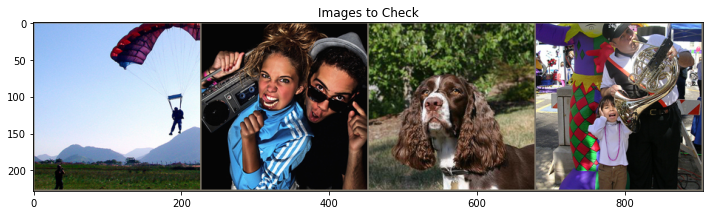

In [ ]:
import numpy as np

image_dir = '/content/drive/MyDrive/FinalProject/CvT-main/DATASET'

images = []

for img in os.listdir(image_dir):
  img_path = os.path.join(image_dir, img)
  images.append(img_transforms(Image.open(img_path)))
  
imshow(torchvision.utils.make_grid(images), title="Images to Check")

## Load pre-trained Model

In [ ]:
from models import build_model

# Model path 
model_path = '/content/drive/MyDrive/FinalProject/CvT-main/models/CvT-13-224x224-IN-1k.pth' 

model = build_model(config)
model.load_state_dict(torch.load(model_path))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

2022-05-17 12:09:30,265:[P:67]:Rank[0/1] => init weight of Linear from trunc norm
2022-05-17 12:09:30,269:[P:67]:Rank[0/1] => init bias of Linear to zeros
2022-05-17 12:09:30,270:[P:67]:Rank[0/1] => init weight of Linear from trunc norm
2022-05-17 12:09:30,276:[P:67]:Rank[0/1] => init bias of Linear to zeros
2022-05-17 12:09:30,277:[P:67]:Rank[0/1] => init weight of Linear from trunc norm
2022-05-17 12:09:30,280:[P:67]:Rank[0/1] => init bias of Linear to zeros
2022-05-17 12:09:30,284:[P:67]:Rank[0/1] => init weight of Linear from trunc norm
2022-05-17 12:09:30,285:[P:67]:Rank[0/1] => init bias of Linear to zeros
2022-05-17 12:09:30,288:[P:67]:Rank[0/1] => init weight of Linear from trunc norm
2022-05-17 12:09:30,289:[P:67]:Rank[0/1] => init bias of Linear to zeros
2022-05-17 12:09:30,293:[P:67]:Rank[0/1] => init weight of Linear from trunc norm
2022-05-17 12:09:30,295:[P:67]:Rank[0/1] => init bias of Linear to zeros
2022-05-17 12:09:30,317:[P:67]:Rank[0/1] => init weight of Linear from

## Apply Saliency Map

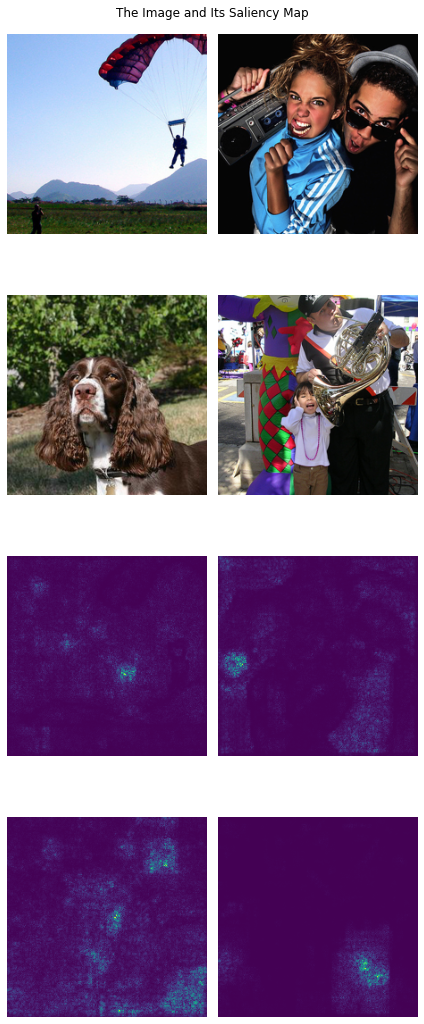

In [ ]:
from matplotlib import gridspec
# Set the model on Eval Mode
model.eval()

saliencies = []

for image in images:
  image = image.reshape(1, 3, 224, 224)
  image = image.to(device)
  image.requires_grad_()

  output = model(image)

  # Catch the output
  output_idx = output.argmax()
  output_max = output[output_idx]

  # Do backpropagation to get the derivative of the output based on the image
  output_max.backward()

  saliency, _ = torch.max(image.grad.data.abs(), dim=1) 
  saliency = saliency.reshape(224, 224)
  saliencies.append(saliency.cpu())

# Visualize the image and the saliency map
plt.figure(figsize=(6,15))
gs = gridspec.GridSpec(nrows=4, ncols=2)

for i in range(4):
  ax0 = plt.subplot(gs[i])
  ax0.imshow(inverse_normalize(images[i]).permute(1,2,0))
  ax0.axis('off')

for i in range(4,8):
  ax0 = plt.subplot(gs[i])
  ax0.imshow(saliencies[i - 4])
  ax0.axis('off')

plt.tight_layout()
plt.suptitle('The Image and Its Saliency Map')
plt.savefig('/content/drive/MyDrive/FinalProject/SaliencyMap/OUTPUT/SaliencyMap.png')
plt.show()

